In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import math

In [2]:

# Enable multiple outputs of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [3]:
blue_chip_stocks = [
    # Banking
    "HDFCBANK.NS",
    "ICICIBANK.NS",
    
    # Information Technology
    "TCS.NS",
    "INFY.NS",
    
    # Consumer Goods
    "HINDUNILVR.NS",
    "ITC.NS",
    
    # Energy
    "RELIANCE.NS",
    "ONGC.NS",
    
    # Pharmaceuticals
    "SUNPHARMA.NS",
    "DRREDDY.NS",
    
    # Automobiles
    "MARUTI.NS",
    "TATAMOTORS.NS",
    
    # Metals
    "TATASTEEL.NS",
    "JSWSTEEL.NS",
    
    # Telecom
    "BHARTIARTL.NS",
    
    # FMCG
    "BRITANNIA.NS",
    
    # Utilities
    "NTPC.NS",
    "POWERGRID.NS",
    
    # Diversified
    "BAJFINANCE.NS"
]

train = yf.download(blue_chip_stocks, start = "2015-01-01")["Adj Close"]


tickers = [
  "AAPL", "MSFT", "AMZN", "GOOG", "TSLA", "META", "JPM", "WMT",
  "V", "AVGO", "XOM", "UNH", "MRK", "PG", "CVX", "CSCO",
  "WFC", "BAC", "INTC", "NKE", "LLY", "PM", "VZ", "BA"
]
train = yf.download(tickers, start = "2015-01-01")["Adj Close"]



[*********************100%%**********************]  19 of 19 completed
[*********************100%%**********************]  24 of 24 completed


In [4]:
train

Ticker,AAPL,AMZN,AVGO,BA,BAC,CSCO,CVX,GOOG,INTC,JPM,...,NKE,PG,PM,TSLA,UNH,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.370152,15.426000,10.009000,113.657219,14.708728,20.481928,75.044243,26.138922,28.075533,48.002338,...,42.759674,69.094551,49.682186,14.620666,87.201057,62.018227,28.228889,41.584095,23.192301,61.023266
2015-01-05,23.683603,15.109500,9.849000,112.870071,14.281432,20.073929,72.044594,25.594038,27.758945,46.512100,...,42.071232,68.766045,49.308140,14.006000,85.764732,60.649242,27.994436,40.443756,23.124804,59.353584
2015-01-06,23.685831,14.764500,9.625000,111.540627,13.854139,20.066500,72.011284,25.000843,27.241608,45.306095,...,41.823742,68.452850,49.731228,14.085333,85.591705,60.258434,28.276968,39.599907,23.303001,59.038017
2015-01-07,24.017960,14.921000,9.885000,113.272369,13.919877,20.251953,71.951263,24.958012,27.813005,45.375229,...,42.687668,68.811874,50.105301,14.063333,86.465622,61.065773,28.094496,39.835598,23.921288,59.636223
2015-01-08,24.940788,15.023000,10.379000,115.275269,14.207482,20.407745,73.597755,25.036705,28.330349,46.389194,...,43.673073,69.598785,50.859550,14.041000,90.592873,61.884838,28.696651,40.717434,24.426165,60.628868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-11,227.570007,195.050003,170.595001,183.910004,41.810001,46.759998,155.259995,187.300003,33.500000,207.449997,...,73.389999,165.539993,105.000000,241.029999,504.359985,262.549988,41.299999,60.160000,69.800003,113.250000
2024-07-12,230.630005,194.490005,170.067001,182.309998,41.590000,47.369999,155.589996,186.779999,34.490002,204.940002,...,73.419998,166.610001,105.949997,248.229996,511.529999,265.739990,41.430000,56.540001,69.239998,113.269997
2024-07-15,234.399994,192.720001,171.419998,179.110001,41.889999,47.400002,158.039993,188.190002,34.459999,210.050003,...,71.309998,164.580002,105.070000,252.639999,515.369995,268.450012,40.790001,57.730000,69.610001,115.209999


In [5]:
pct_change_df = train.pct_change(periods=126).fillna(0)
pct_change_df = pct_change_df.reset_index()

/var/folders/y8/mm_hx_9563jfv5g5r_w7kvxr0000gn/T/ipykernel_12414/1752249258.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change_df = train.pct_change(periods=126).fillna(0)


In [6]:
df = pd.DataFrame(columns=["Stock", "returns", "count", "profitable trades count", "loss trades count", "sharpe", "min", "max"])

profits = []
for ticker in pct_change_df.columns[1:]:
    trade = []
    j = 0
    for i in range(len(pct_change_df) - 30):
        if(j!=0):
            j-=1
            continue
        if pct_change_df[ticker].iloc[i] > 0.25:
            j=30
            date1 = pct_change_df.iloc[i].Date
            date2 = date1 + pd.DateOffset(days=30)
            if((date1 in train.index) & (date2 in train.index)):
                diff = train[train.index == date2][ticker].values - train[train.index == date1][ticker].values
                if(diff[0]<-15):
                    diff = np.array([-15])#Stop loss triggered - max loss ... approach can be improved
                if(math.isnan(diff) == False):
                    trade.append(diff)
                    profits.append(diff)
    
    
    if(len(trade)>1):
        count_positive_trades = len(list(filter(lambda x: x > 0, trade)))
        count_negative_trades = len(list(filter(lambda x: x < 0, trade)))

        new_row = {"Stock":ticker,
                   "returns":sum(trade),
                   "count": len(trade),
                   "profitable trades count": count_positive_trades,
                   "loss trades count": count_negative_trades,
                   "sharpe": np.mean(trade)/np.std(trade),
                   "min":min(trade),
                   "max":max(trade)}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

df

/var/folders/y8/mm_hx_9563jfv5g5r_w7kvxr0000gn/T/ipykernel_12414/247337312.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if(math.isnan(diff) == False):
/var/folders/y8/mm_hx_9563jfv5g5r_w7kvxr0000gn/T/ipykernel_12414/247337312.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


,Stock,returns,count,profitable trades count,loss trades count,sharpe,min,max
0,AAPL,[-18.51157569885254],16,9,7,-0.162039,[-15],[9.597236633300781]
1,AMZN,[17.493013381958008],17,12,5,0.133778,[-15],[14.123992919921875]
2,AVGO,[-12.771997451782227],20,7,13,-0.135971,[-9.852001190185547],[8.6199951171875]
3,BA,[185.5594940185547],16,10,6,0.446136,[-15],[83.55000305175781]
4,BAC,[3.627960205078125],14,10,4,0.179933,[-3.1768417358398438],[1.9552841186523438]
5,CSCO,[1.869485855102539],6,4,2,0.141704,[-3.484020233154297],[3.3615798950195312]
6,CVX,[-25.100719451904297],8,1,7,-0.522148,[-15],[7.339897155761719]
7,GOOG,[53.17699432373047],13,10,3,0.659024,[-10.359214782714844],[14.683296203613281]
8,INTC,[-21.85752296447754],10,2,8,-0.551740,[-11.841901779174805],[3.3564910888671875]
9,JPM,[6.015724182128906],14,9,5,0.058734,[-15],[13.3966064453125]


In [7]:
sum(profits)

array([695.76669693])

In [8]:
np.mean(df.sharpe)

0.08643457714005753

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import mplfinance as mpf
from sklearn.ensemble import IsolationForest 
import plotly.graph_objects as go


In [10]:

def preprocess_data(data): 
    processed_data = {}
    for ticker, df in data.items():
        df = df.resample('W').mean()
        processed_data[ticker] = df 
    return processed_data
processed_data = preprocess_data(train)

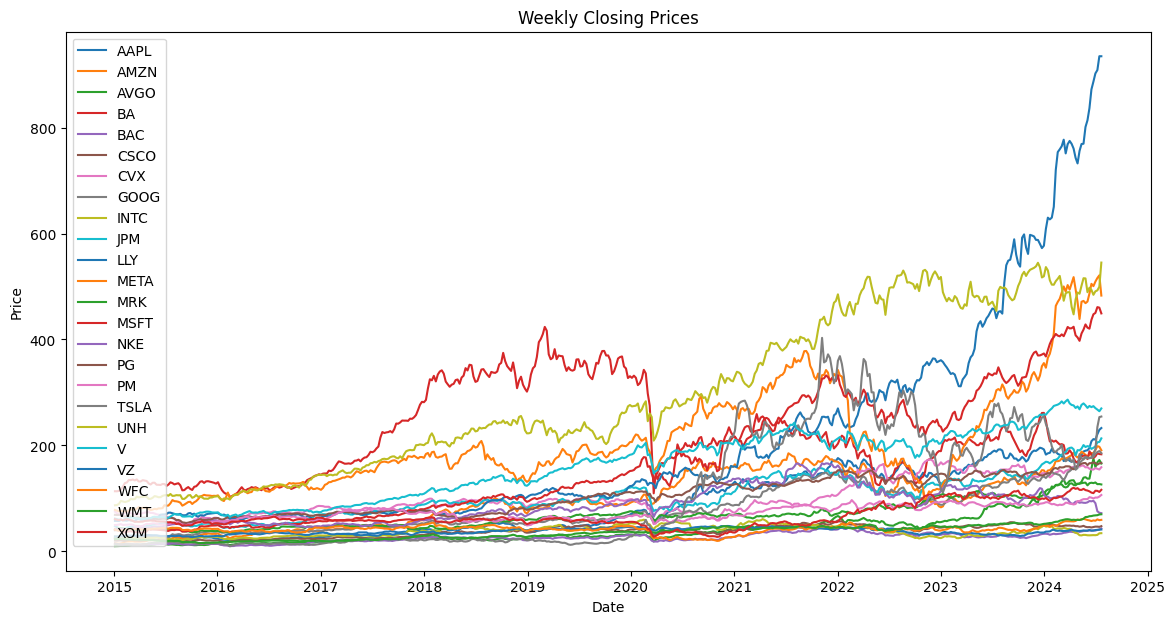

In [11]:
def plot_data(processed_data): 
    plt.figure(figsize=(14, 7))
    for ticker, df in processed_data.items():
        plt.plot(df, label=ticker) 
    plt.title('Weekly Closing Prices') 
    plt.xlabel('Date') 
    plt.ylabel('Price')
    plt.legend() 
plot_data(processed_data)

In [20]:
i=0
for t, df in processed_data.items():
    print(t)
    len(df.index)
    i+=1
    if(i==3):
        break

AAPL


499

AMZN


499

AVGO


499

In [44]:
class AnomalyDetector:
    def __init__(self, contamination=0.05):
        self.contamination = contamination
        self.model = IsolationForest(contamination=self.contamination)
    def fit(self, data):
        self.data = pd.DataFrame(data) # Ensure data is a DataFrame 
        self.model.fit(self.data.values.reshape(-1, 1))
    def detect_anomalies(self):
        self.data['anomaly'] = self.model.predict(self.data.values.reshape(-1, 1))
        self.data['anomaly'] = self.data['anomaly'].apply(lambda x: 1 if x == -1 else 0) 
        return self.data

detectors = {}
for ticker, df in processed_data.items():
    detector = AnomalyDetector()
    
    if ticker not in detectors:
        detectors[ticker] = []

    for start in range(0, len(df), 60):
        end = start + 60
        window = df.iloc[start:end]    
        detector.fit(window)
        detectors[ticker].append(detector.detect_anomalies())  

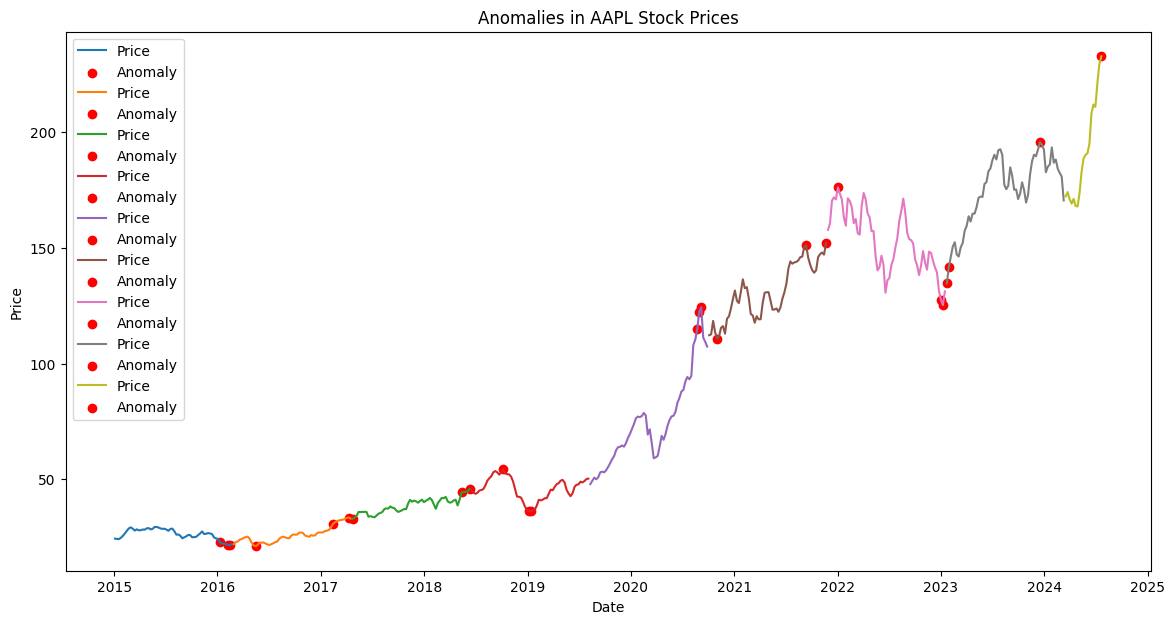

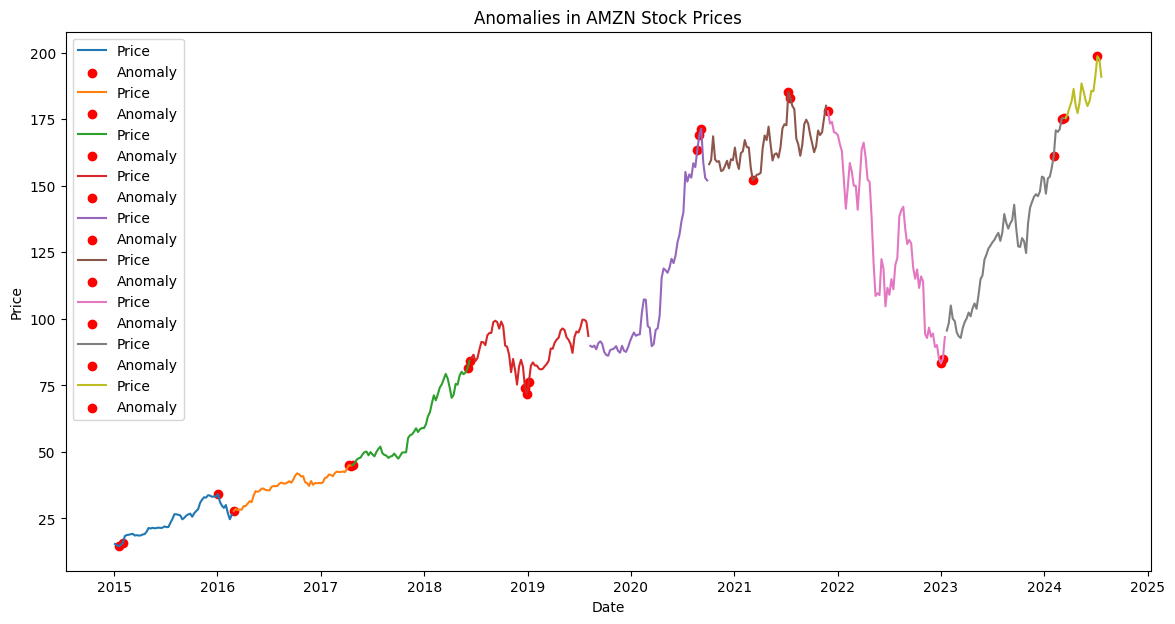

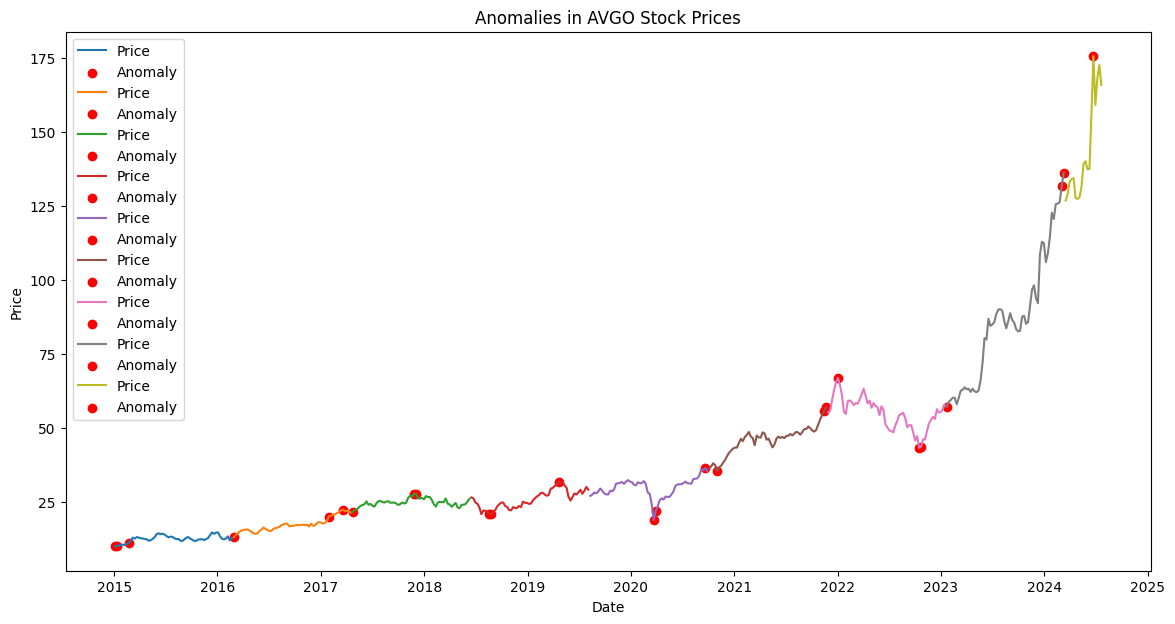

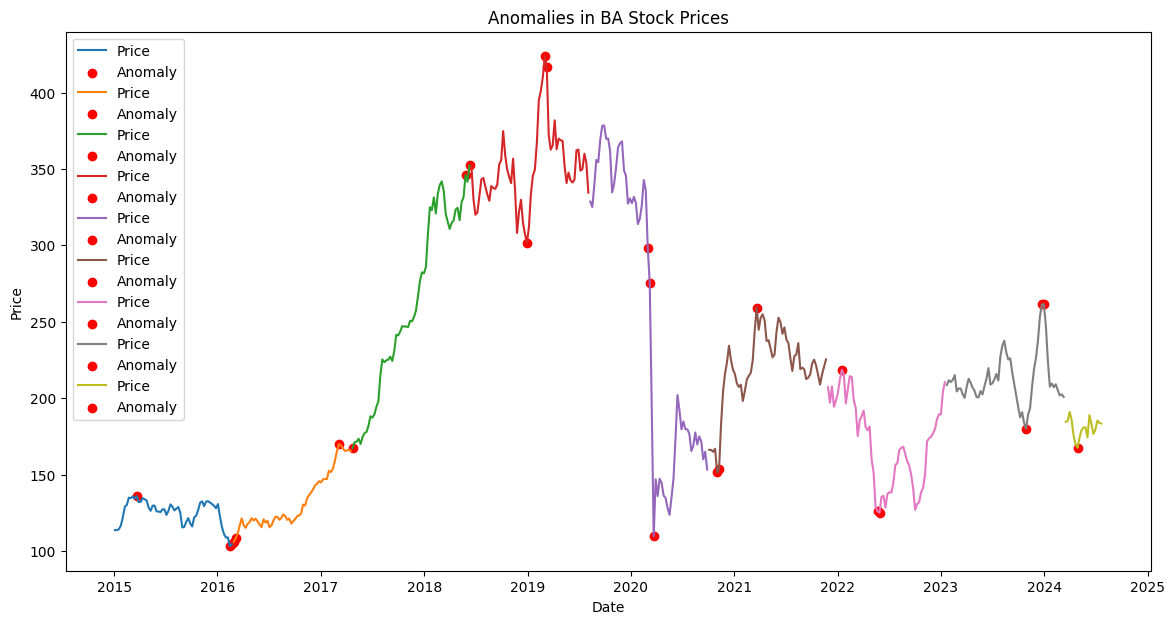

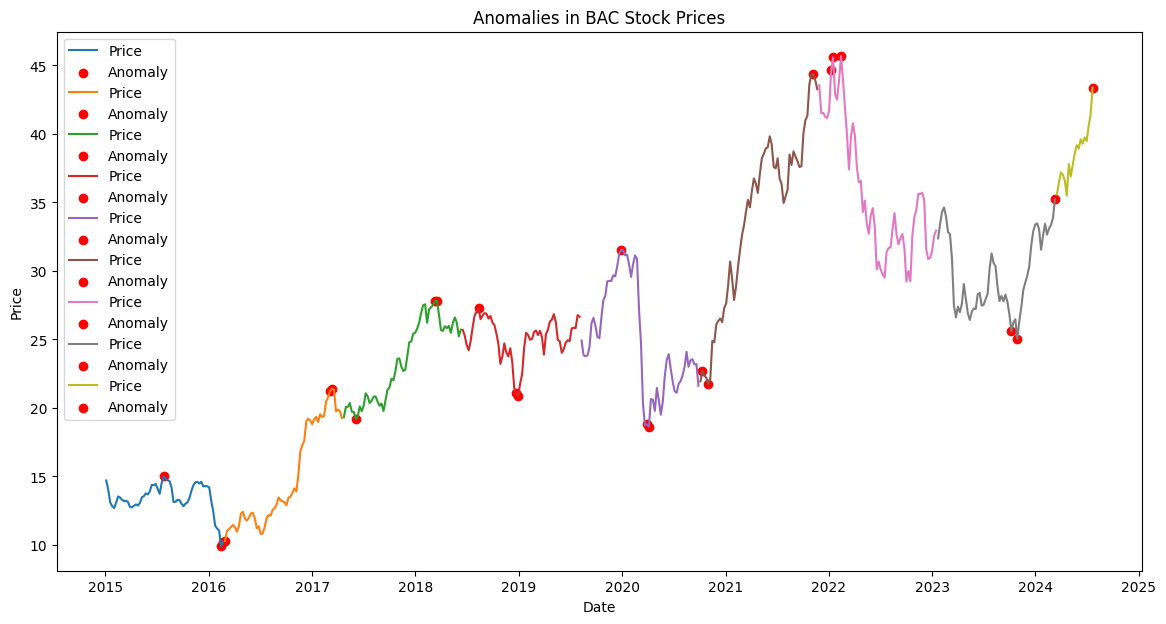

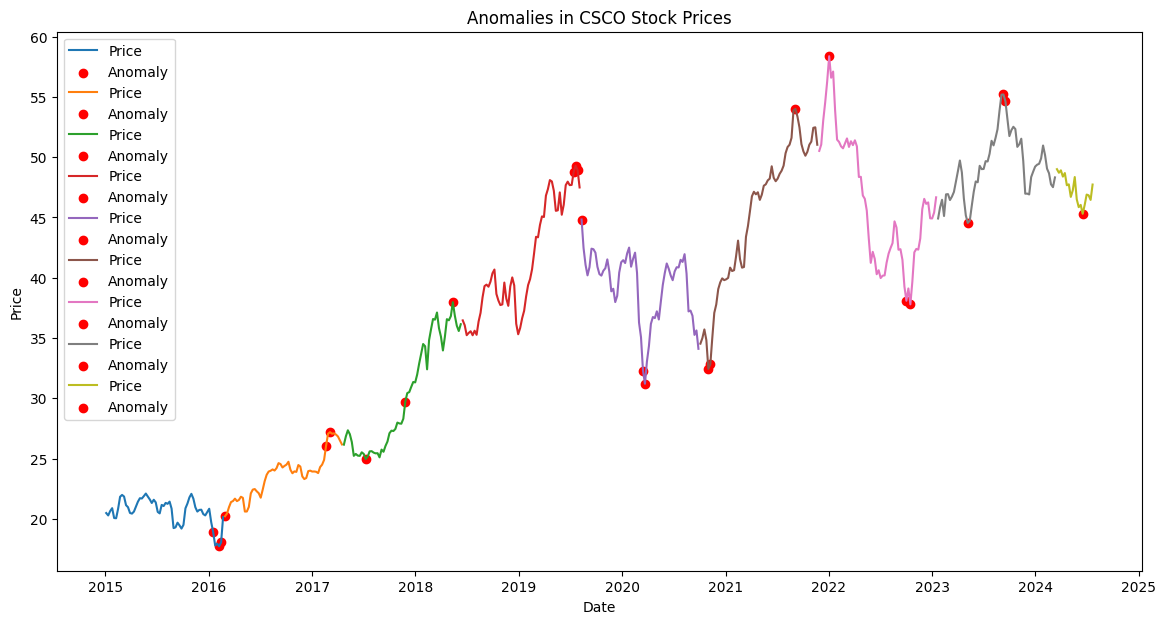

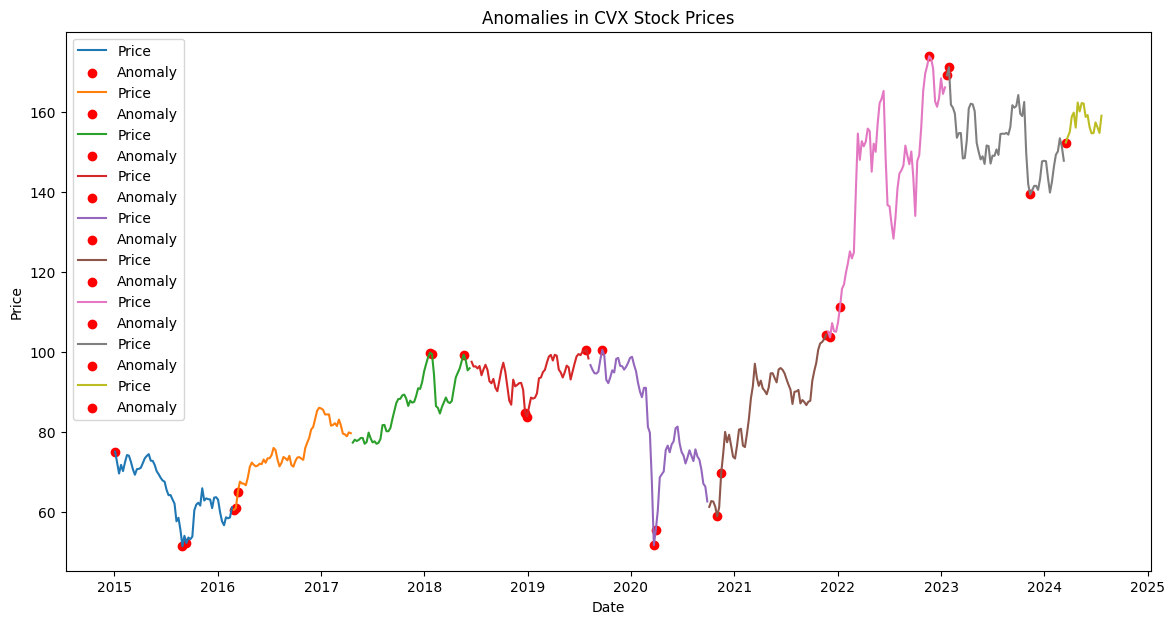

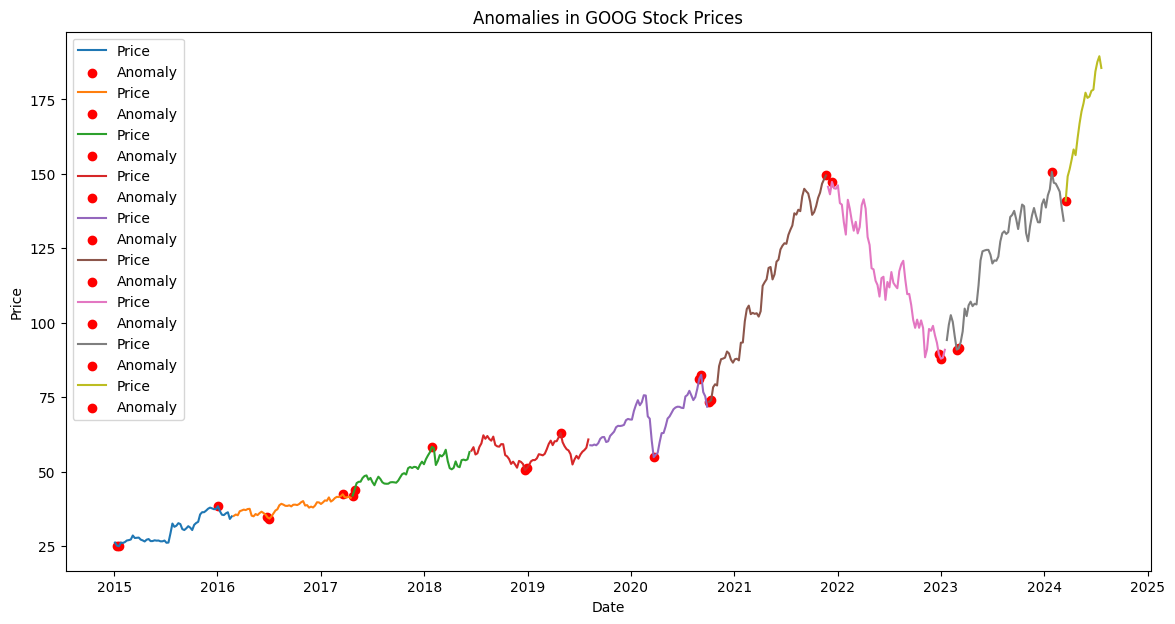

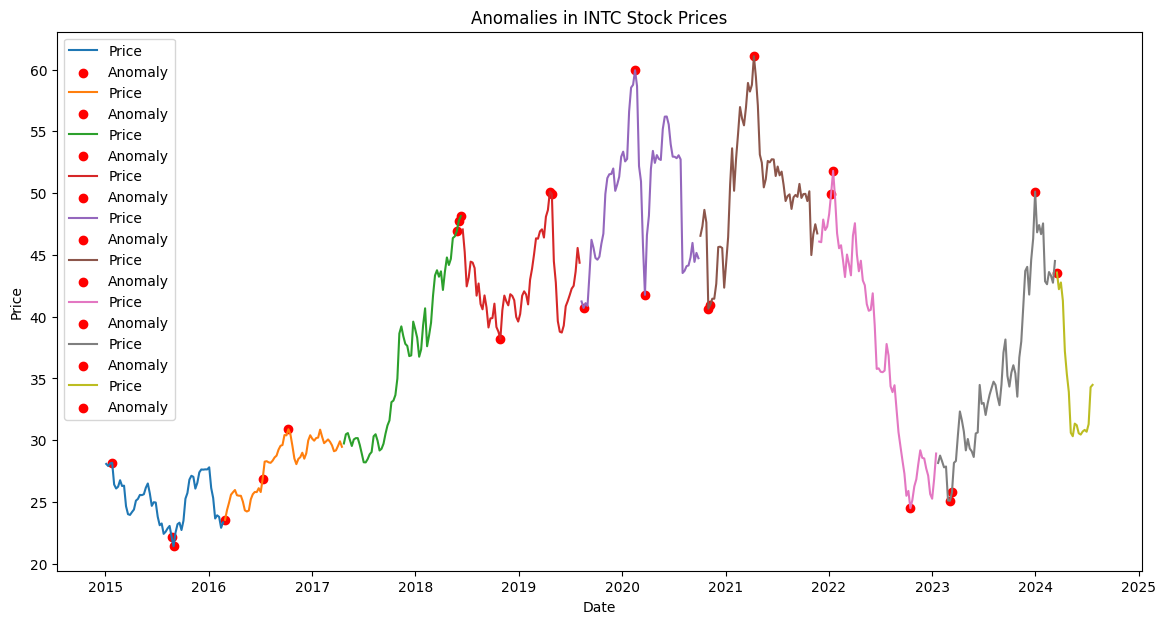

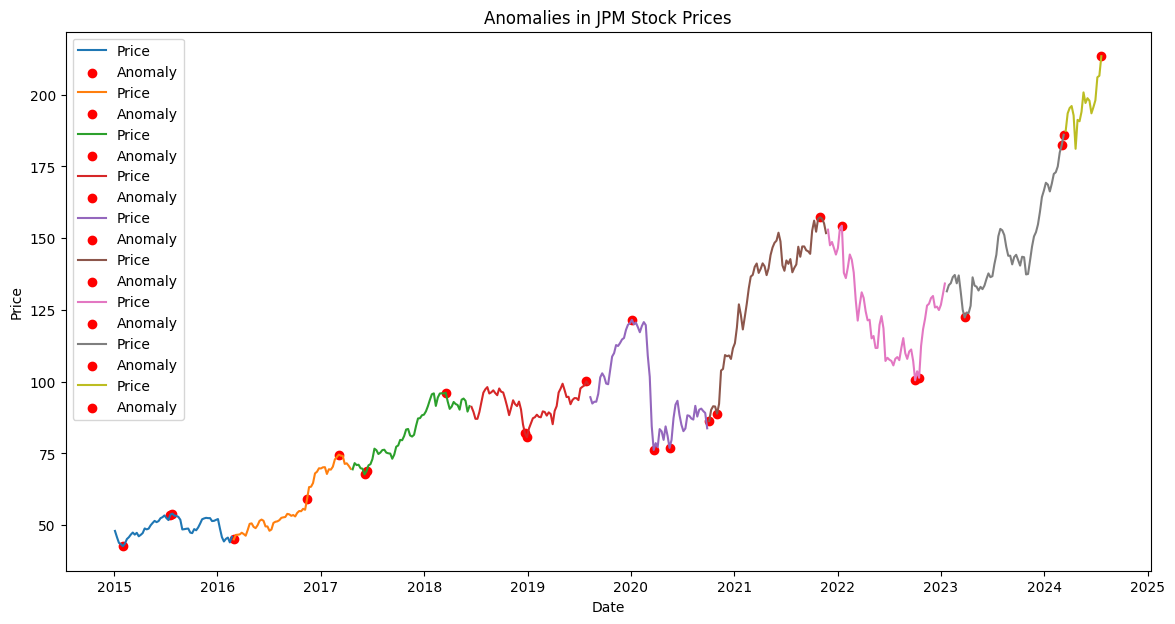

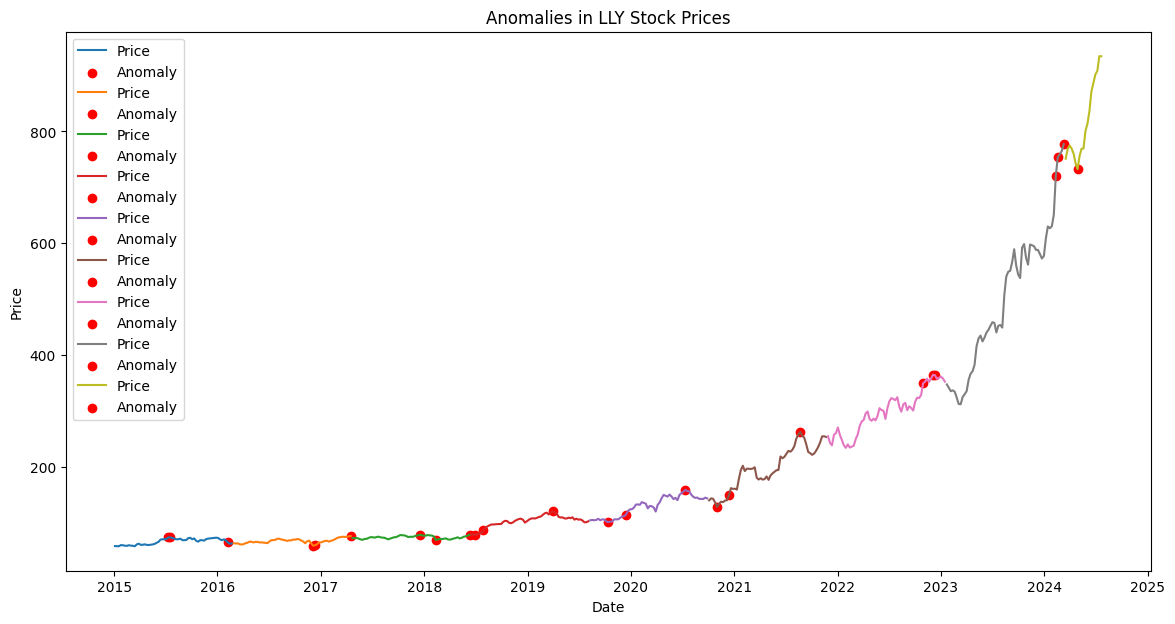

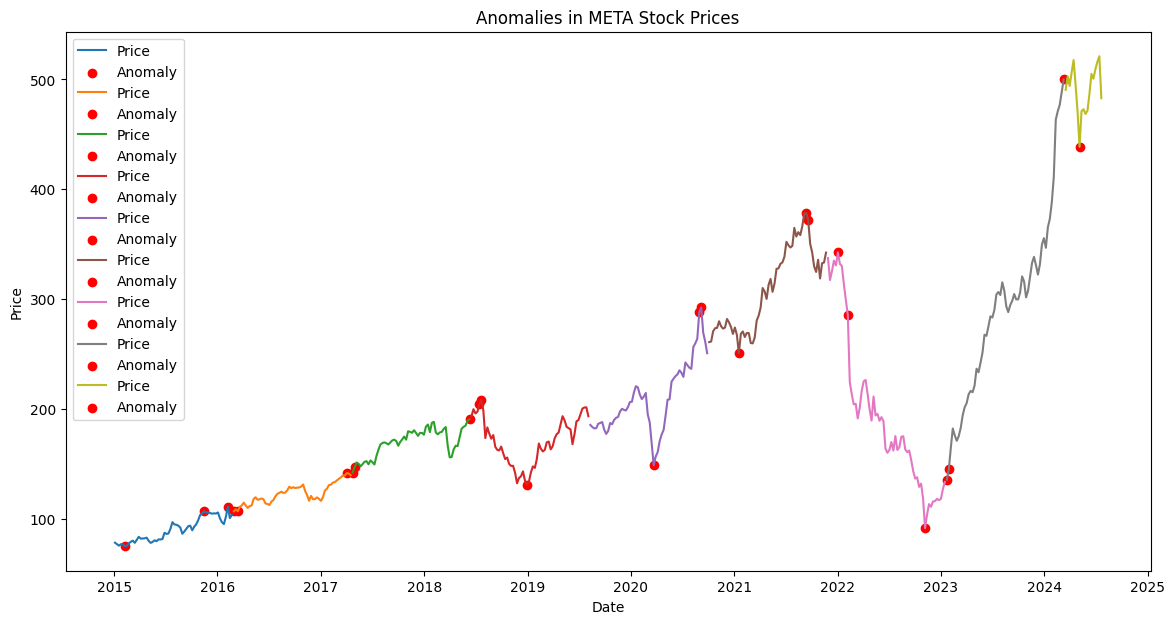

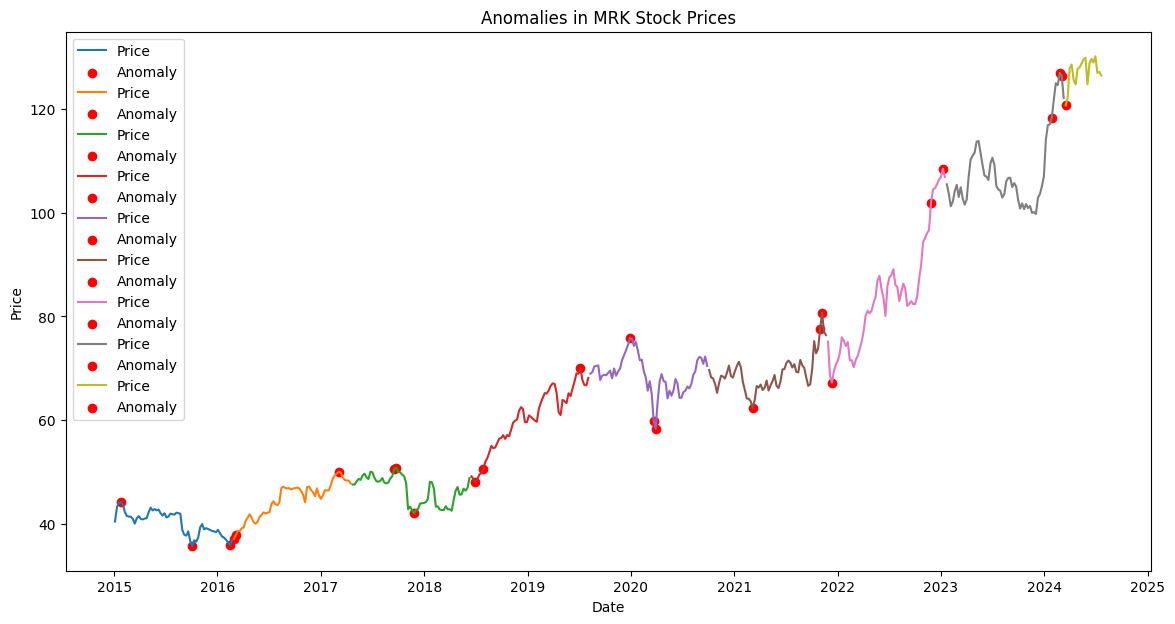

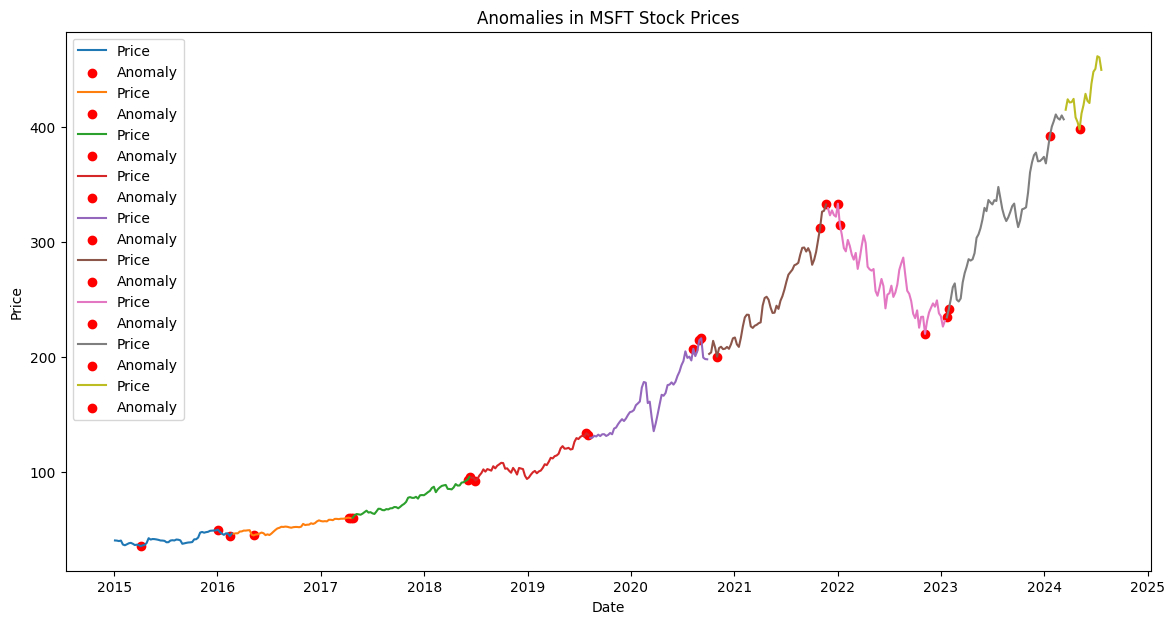

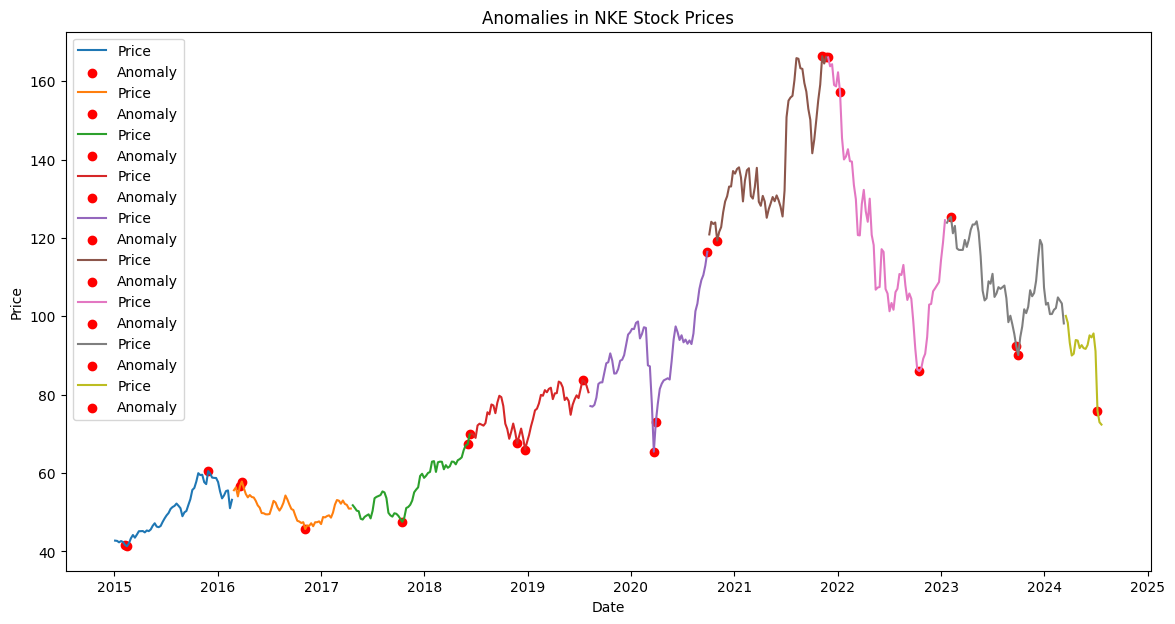

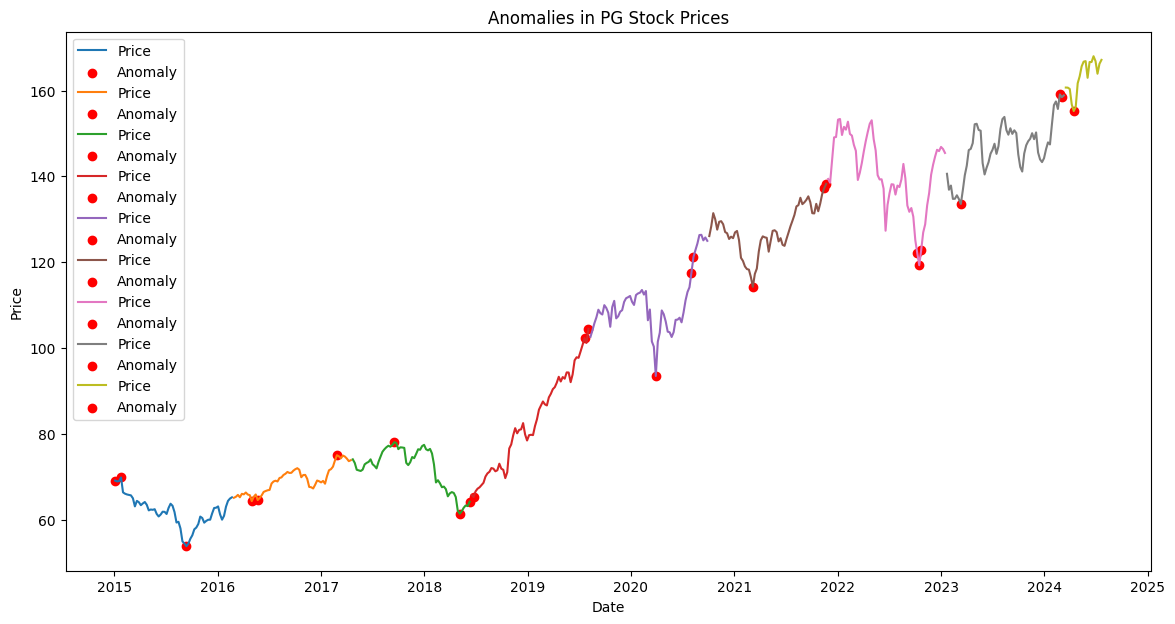

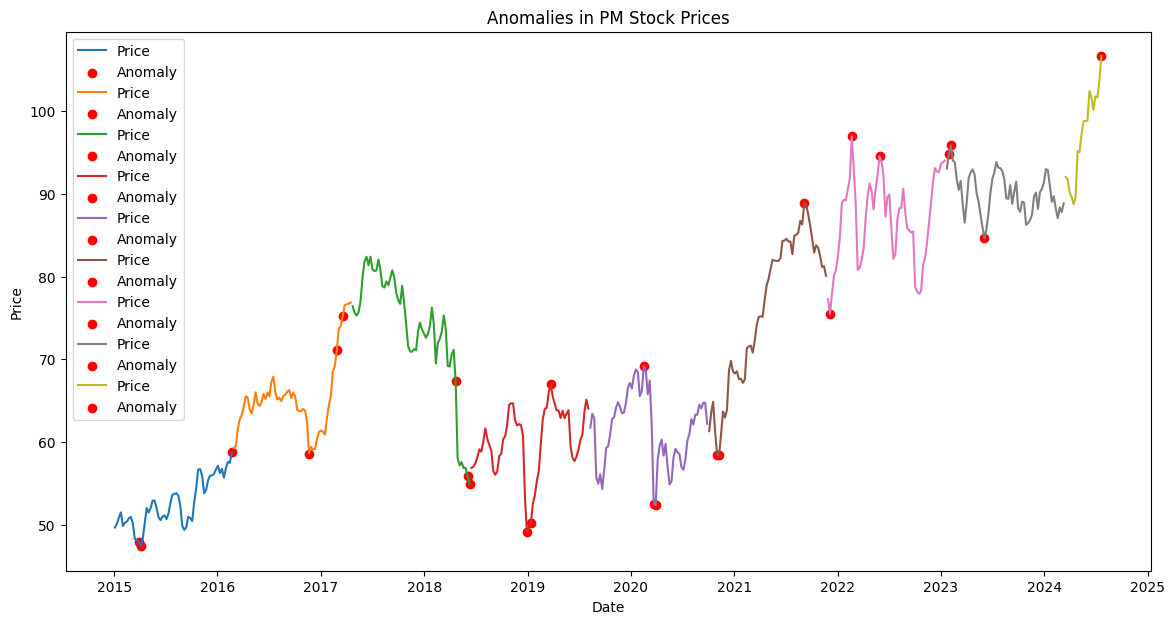

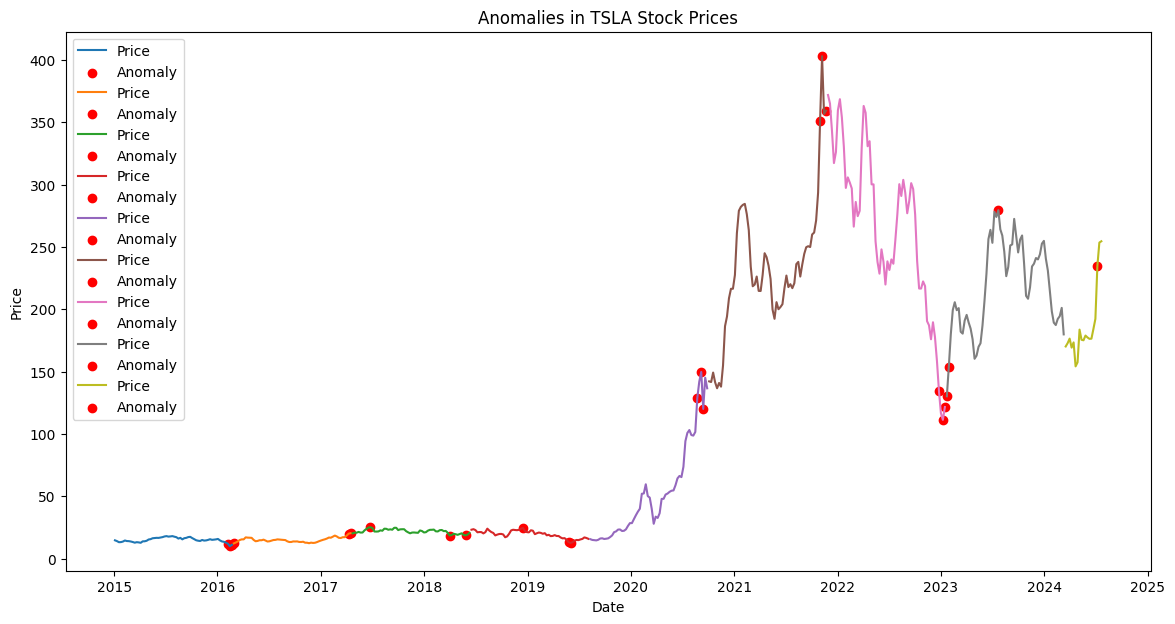

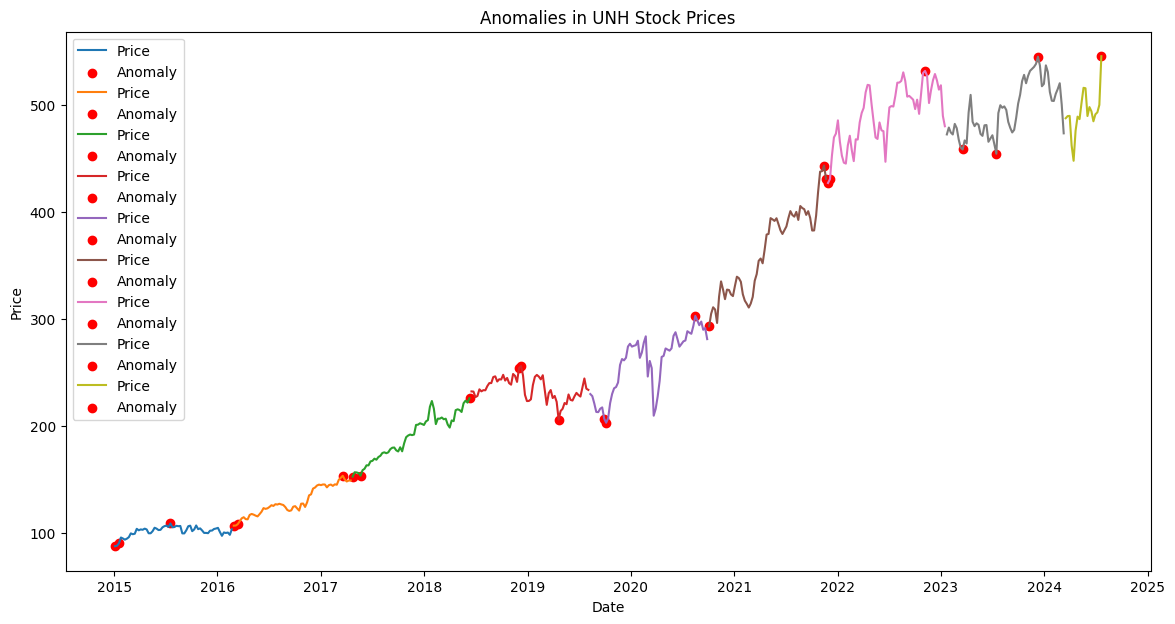

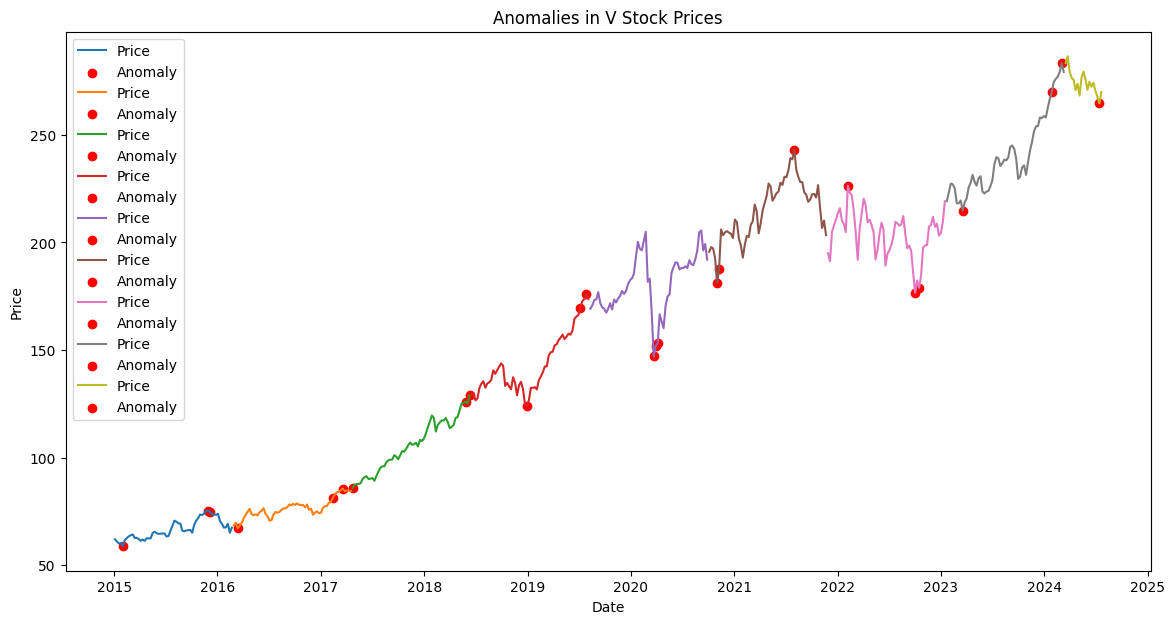

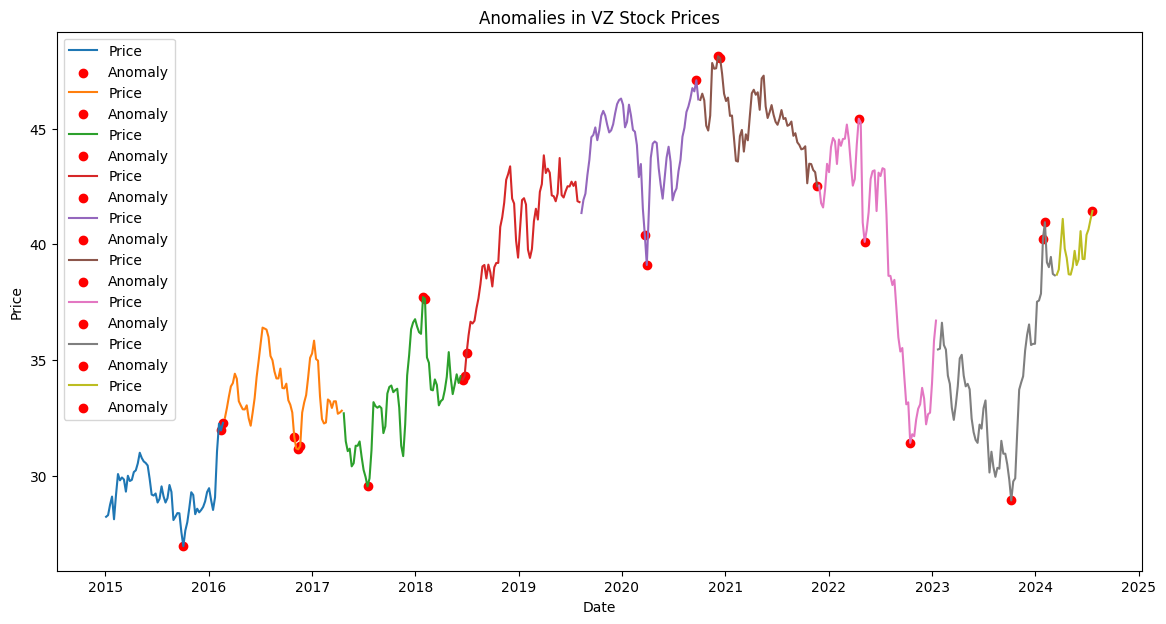

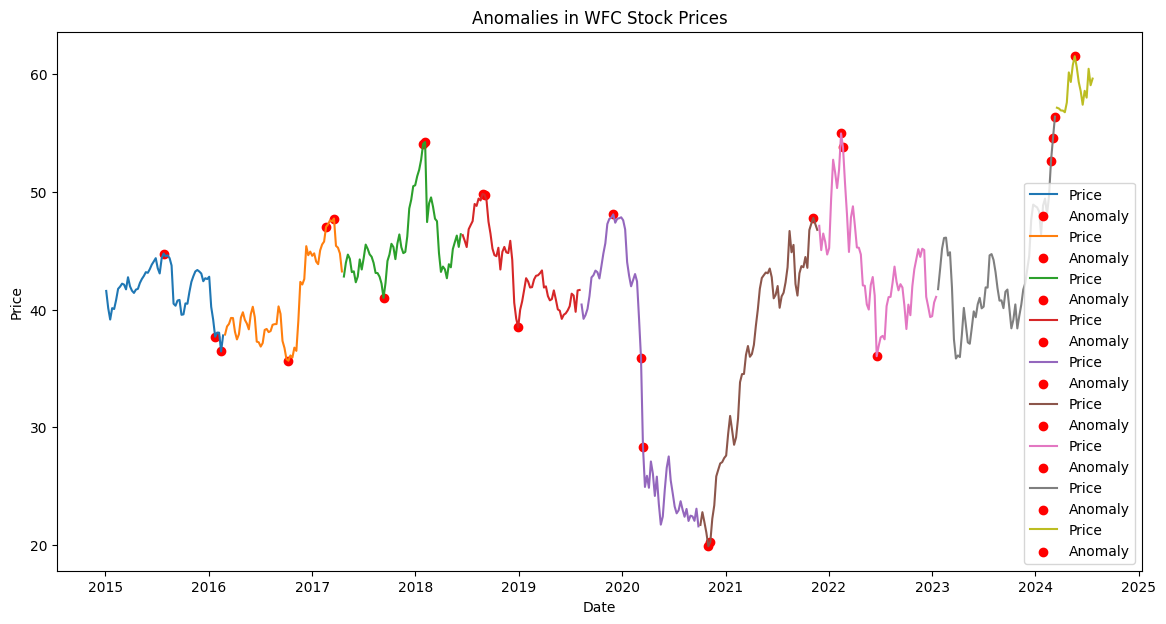

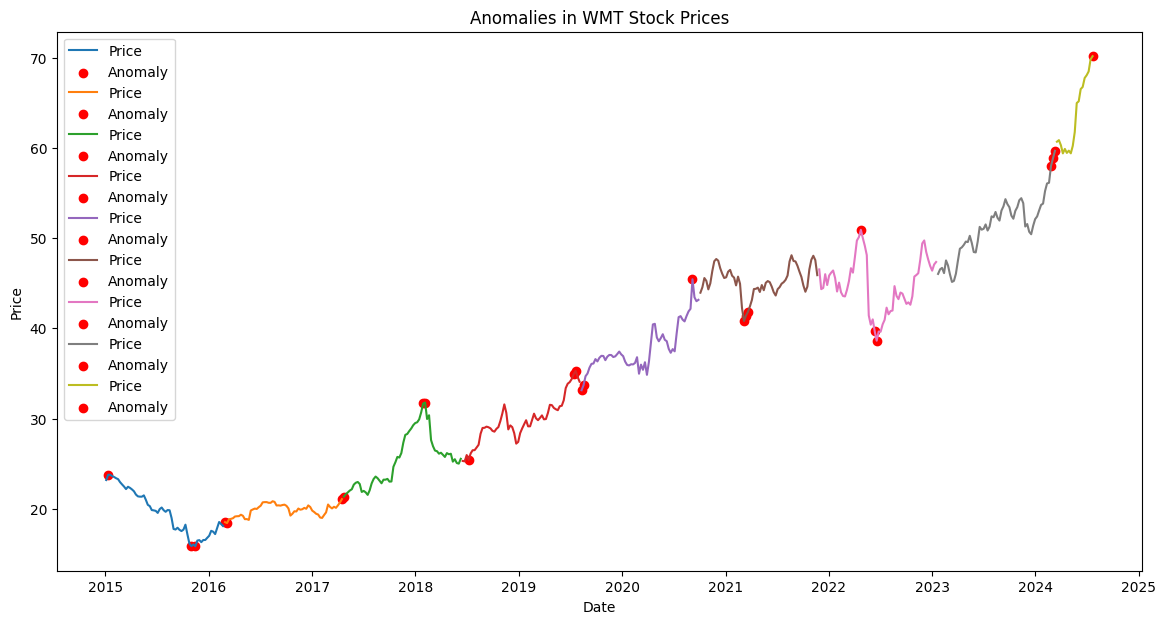

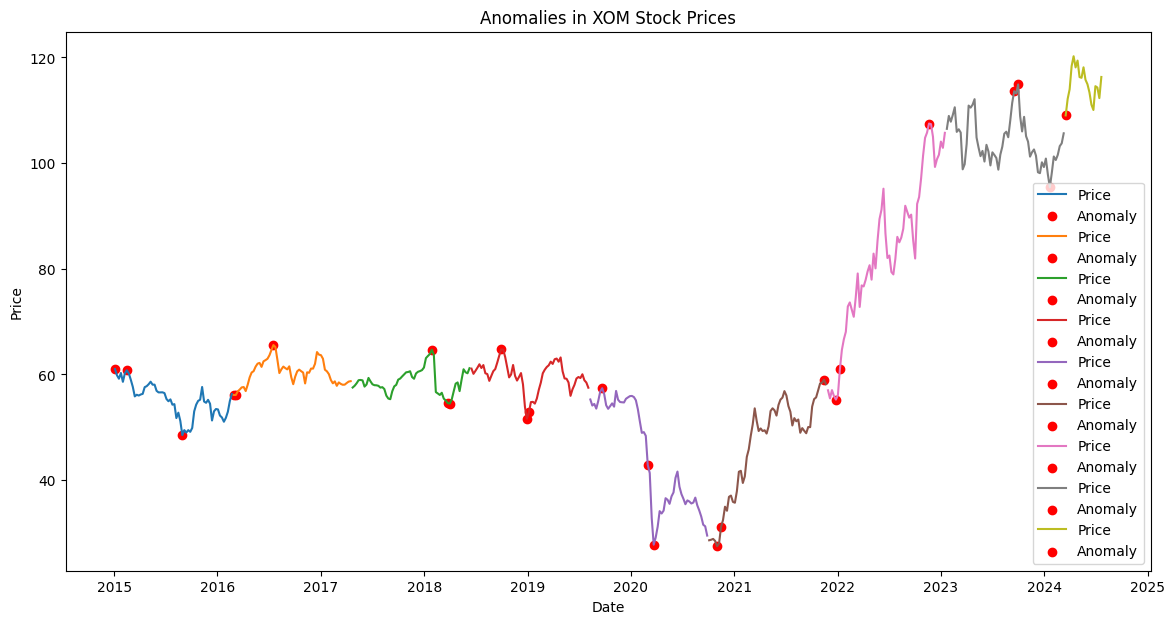

In [56]:
import matplotlib.pyplot as plt

def plot_anomalies(detectors):
    for ticker, df in detectors.items():
        plt.figure(figsize=(14, 7))
        anomalies = []
        for data in df:
            plt.plot(data.index, data.iloc[:, 0], label='Price')
            anomalies = data[data['anomaly'] == 1]
            plt.scatter(anomalies.index, anomalies.iloc[:, 0], color='red', label='Anomaly') 
        plt.title(f'Anomalies in {ticker} Stock Prices')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
plot_anomalies(detectors)